In [ ]:
!pip install quantstats

In [ ]:
import quantstats as qs

In [ ]:
def MONTHLY(ASSETS , BEGIN , END):
  from yfinance import download
  DATA = download(tickers=ASSETS , start=BEGIN , end=END)
  ADJUSTED = DATA["Adj Close"]
  DAILY = ADJUSTED.pct_change()
  import quantstats as qs
  MONTHLY = qs.utils.aggregate_returns(returns=DAILY , period="M")
  from pandas import date_range
  MONTHLY.index = date_range(start=BEGIN , end=END , freq="M")
  return MONTHLY

In [ ]:
PAST_DATA = MONTHLY(
    ASSETS=["AAPL", "BTC-USD", "ETH-USD", "GLD", "SBUX", "TSLA"],
    BEGIN="2018-09-01",
    END="2023-09-01"
)

[*********************100%%**********************]  6 of 6 completed


In [ ]:
!pip install Riskfolio-Lib

In [ ]:
import riskfolio as CHIPMUNK

In [ ]:
RACCOON = CHIPMUNK.Portfolio(
    returns=PAST_DATA,
    sht=True
)

RACCOON.upperlng = 1.6

RACCOON.assets_stats()

GORILLA = RACCOON.efficient_frontier(
    points=200
)

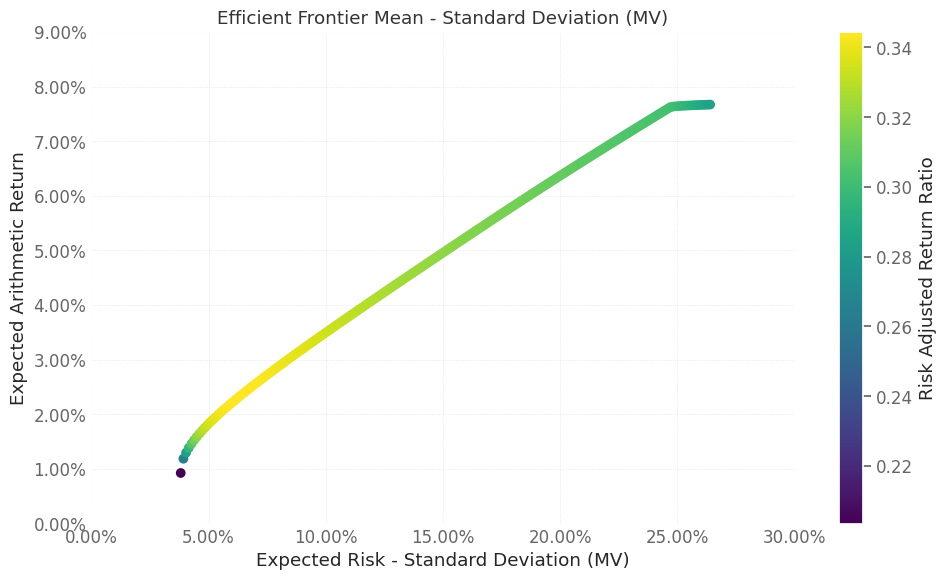

In [ ]:
PAINTING = CHIPMUNK.plot_frontier(
    w_frontier=GORILLA,
    mu=RACCOON.mu,
    cov=RACCOON.cov,
    returns=PAST_DATA,
    t_factor=1,
    rf=0.0015
)

In [ ]:
FOXIE = GORILLA.T

X_AND_Y = PAINTING.collections[0].get_offsets()

FOXIE[["Std.Dev.", "Exp.Ret."]] = X_AND_Y

In [ ]:
FOXIE["Sharpe"] = (FOXIE["Exp.Ret."] - 0.0015) / FOXIE["Std.Dev."]
FOXIE["Sharpe"] = round(FOXIE["Sharpe"], 4)

In [ ]:
from plotly.express import scatter as BULL

BISON = BULL(data_frame=FOXIE,
             x="Std.Dev.",
             y="Exp.Ret.",
             color="Sharpe",
             hover_data={SKUNK: ":.15%" for SKUNK in FOXIE.columns[:-1]})

In [ ]:
BISON.update_layout(
    template="plotly_dark",
    font_family="Courier New",
    hoverlabel={
        "font_family": "Courier New",
        "bgcolor": "black"
    }
)

In [ ]:
def MONTHLY(ASSETS , BEGIN , END):
  from yfinance import download
  DATA = download(tickers=ASSETS , start=BEGIN , end=END)
  ADJUSTED = DATA["Adj Close"]
  DAILY = ADJUSTED.pct_change()
  import quantstats as qs
  MONTHLY = qs.utils.aggregate_returns(returns=DAILY , period="M")
  from pandas import date_range
  MONTHLY.index = date_range(start=BEGIN , end=END , freq="M")
  return MONTHLY

In [ ]:
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"

monthly_returns = MONTHLY(ASSETS, BEGIN, END)


[*********************100%%**********************]  6 of 6 completed


In [ ]:
!pip install scipy

In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(weights):
    # Calculate the portfolio returns and volatility
    portfolio_returns = monthly_returns.mul(weights).sum(axis=1)
    portfolio_volatility = portfolio_returns.std()

    # Calculate the Sharpe Ratio
    risk_free_rate = 0.002
    sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_volatility

    # Minimize the negative Sharpe Ratio to maximize it
    return -sharpe_ratio

# Define the constraints
constraints = [
    {"type": "ineq", "fun": lambda x: x - 0.05},  # Minimum weight of Dogecoin (DOGE-USD) is 5%
    {"type": "ineq", "fun": lambda x: x - 0.1},   # Minimum weight of Bitcoin (BTC-USD) is 10%
    {"type": "ineq", "fun": lambda x: 0.4 - x.sum()},  # Maximum allowable weight for each individual asset is 40%
    {"type": "ineq", "fun": lambda x: 1.5 - x.sum()}   # Maximum sum of positive weights is 150%
]

# Define the bounds
bounds = [(0, 1)] * len(ASSETS)  # 0 <= weight <= 1 for each asset

# Set an initial guess for the weights
initial_guess = [1 / len(ASSETS)] * len(ASSETS)

# Run the optimization
result = minimize(objective, initial_guess, method="SLSQP", bounds=bounds, constraints=constraints)

# Get the optimized weights
optimized_weights = result.x

# Calculate the investment amount in Ethereum (ETH-USD)
investment_amount = 6000
eth_investment = investment_amount * optimized_weights[0]

# Round the investment amount to the nearest integer
rounded_eth_investment = round(eth_investment)

rounded_eth_investment

600

In [ ]:
def MONTHLY(ASSETS , BEGIN , END):
  from yfinance import download
  DATA = download(tickers=ASSETS , start=BEGIN , end=END)
  ADJUSTED = DATA["Adj Close"]
  DAILY = ADJUSTED.pct_change()
  import quantstats as qs
  MONTHLY = qs.utils.aggregate_returns(returns=DAILY , period="M")
  from pandas import date_range
  MONTHLY.index = date_range(start=BEGIN , end=END , freq="M")
  return MONTHLY

In [ ]:
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"

monthly_returns = MONTHLY(ASSETS, BEGIN, END)

[*********************100%%**********************]  6 of 6 completed


In [ ]:
# Initialize the weights
a = 0.86253
b = -5.96496
c = 8.20063
d = 0.65689
e = -1.16929
f = 0.37885
g = 0.12276

# Input features of the new house
age = 80
fireplaces = 4
lot_size = 12000
pool_area = 200

# Calculate the hidden node input
hidden_node_input = a * age + b * fireplaces + c * lot_size + d * pool_area

# Apply the activation function to the hidden node input
import math
hidden_node_output = 1 / (1 + math.exp(-hidden_node_input))

# Calculate the output node input
output_node_input = e * hidden_node_output + f

# Apply the activation function to the output node input
output_node_output = 1 / (1 + math.exp(-output_node_input))

# Scale the output to the desired range (selling price in thousand dollars)
predicted_selling_price = output_node_output * 1000

# Round the predicted selling price to the nearest integer
predicted_selling_price = round(predicted_selling_price)

predicted_selling_price

312

In [ ]:
a = 3.4695
b = 0.78376
c = 0.40206
d = -0.37237
e = -0.95694
f = -1.36343
g = 0.72154
h = 3.98898
i = -9.10677
j = 12.56564
k = 1.01959

# Input features of the sequel to "Insidious"
runtime = 1.2
genre_horror = 1
language_english = 1

# Calculate the hidden node input
hidden_node_input = a * runtime + b * genre_horror + c * language_english

# Apply the activation function to the hidden node input
import math
hidden_node_output = 1 / (1 + math.exp(-hidden_node_input))

# Calculate the output node input
output_node_input = g * hidden_node_output + h

# Apply the activation function to the output node input
output_node_output = 1 / (1 + math.exp(-output_node_input))

# Scale the output to the desired range (budget in millions)
predicted_budget = output_node_output * 10

# Round the predicted budget to three decimal places
predicted_budget = round(predicted_budget, 3)

predicted_budget

9.91

In [ ]:
!pip install quantstats
import quantstats as qs

In [ ]:
from yfinance import download
from pandas import date_range
import quantstats as qs

def MONTHLY(ASSETS, BEGIN, END):
    DATA = download(tickers=ASSETS, start=BEGIN, end=END)
    ADJUSTED = DATA["Adj Close"]
    DAILY = ADJUSTED.pct_change()
    MONTHLY = qs.utils.aggregate_returns(returns=DAILY, period="M")
    MONTHLY.index = date_range(start=BEGIN, end=END, freq="M")
    return MONTHLY

In [ ]:
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"

monthly_returns = MONTHLY(ASSETS, BEGIN, END)

[*********************100%%**********************]  6 of 6 completed


In [ ]:
!pip install Riskfolio-Lib
import riskfolio as rf

In [ ]:
OBJECT = rf.Portfolio(returns=monthly_returns)
OBJECT.assets_stats()
SHARPY = OBJECT.optimization( rm="MV" ,obj="Sharpe" , rf=0.002 )



In [ ]:
round( SHARPY , 4 )

,weights
BTC-USD,0.0329
DOGE-USD,0.0280
ETH-USD,0.0000
GLD,0.5050
SBUX,0.2312
TSLA,0.2029


In [ ]:
The maximum allowable weight for each individual asset is 40%,
The minimum weight of Dogecoin (DOGE-USD) is 5%,
The minimum weight of Bitcoin (BTC-USD) is 10%.



-1 * ETH-USD  + -1 * DOGE-USD + -1 * TSLA + -1 * BTC-USD + -1* SBUX + -1 * GLD >= -0.40

0 * ETH-USD  + 1 * DOGE-USD + 0 * TSLA + 0 * BTC-USD + 0 * SBUX + 0 * GLD > 0.05

0 * ETH-USD  + 0 * DOGE-USD + 0 * TSLA + 1 * BTC-USD + 0 * SBUX + 0 * GLD > 0.10



In [ ]:
import numpy as np
A = np.array(object=[[-1,-1,-1,-1,-1,-1], [0,1,0,0,0,0], [1,0,0,0,0,0]])
A


array([[-1, -1, -1, -1, -1, -1],
       [ 0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0]])

In [ ]:
B = np.array(object=[[-0.40], [0.05], [0.10]])
B

array([[-0.4 ],
       [ 0.05],
       [ 0.1 ]])

In [ ]:
OBJECT = rf.Portfolio(returns=monthly_returns,ainequality=A , binequality=B)
OBJECT.assets_stats()
SHARPY = OBJECT.optimization( rm="MV" ,obj="Sharpe" , rf=0.002 )
SHARPY

The problem doesn't have a solution with actual input parameters


In [ ]:
import riskfolio as rf

ef = rf.EfficientFrontier(returns=monthly_returns)
ef.calculate()

# Select the portfolio on the efficient frontier that satisfies the constraints
constraints = {
    "ETH-USD": [0.0, 0.4],
    "DOGE-USD": [0.05, 0.4],
    "TSLA": [0.0, 0.4],
    "BTC-USD": [0.1, 0.4],
    "SBUX": [0.0, 0.4],
    "GLD": [0.0, 0.4]
}

portfolio = ef.select_portfolio(constraints=constraints)

print(portfolio)

AttributeError: ignored

In [ ]:
!pip install quantstats

def MONTHLY(ASSETS , BEGIN , END):
  from yfinance import download
  DATA = download(tickers=ASSETS , start=BEGIN , end=END)
  ADJUSTED = DATA["Adj Close"]
  DAILY = ADJUSTED.pct_change()
  import quantstats as qs
  MONTHLY = qs.utils.aggregate_returns(returns=DAILY , period="M")
  from pandas import date_range
  MONTHLY.index = date_range(start=BEGIN , end=END , freq="M")
  return MONTHLY

# Run the function with the desired parameters
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"
monthly_returns = MONTHLY(ASSETS, BEGIN, END)

# Perform portfolio optimization
import numpy as np
from scipy.optimize import minimize

# Define the objective function to maximize the Sharpe Ratio
def objective(weights):
    returns = np.dot(monthly_returns, weights)
    volatility = np.std(returns)
    risk_free_rate = 0.002  # 0.2% monthly risk-free rate
    sharpe_ratio = (returns.mean() - risk_free_rate) / volatility
    return -sharpe_ratio

# Define the constraints
constraints = [
    {"type": "ineq", "fun": lambda x: 0.4 - np.sum(x)},  # Maximum allowable weight for each asset is 40%
    {"type": "ineq", "fun": lambda x: 0.05 - x[1]},  # Minimum weight of Dogecoin is 5%
    {"type": "ineq", "fun": lambda x: 0.1 - x[3]},  # Minimum weight of Bitcoin is 10%
    {"type": "ineq", "fun": lambda x: np.sum(x) - 1.5}  # Maximum sum of positive weights is 150%
]

# Define the bounds
bounds = [(None, None)] * len(ASSETS)  # No bounds on the weights

# Initial guess for the weights
x0 = np.ones(len(ASSETS)) / len(ASSETS)

# Run the optimization
result = minimize(objective, x0, method="SLSQP", bounds=bounds, constraints=constraints)

# Get the optimized weights
weights = result.x

# Calculate the investment amount in Ethereum (ETH-USD)
investment_amount = 6000
eth_index = ASSETS.index("ETH-USD")
eth_investment = round(investment_amount * weights[eth_index])

# Print the investment amount in Ethereum (ETH-USD)
print("Investment amount in Ethereum (ETH-USD):", eth_investment)

[*********************100%%**********************]  6 of 6 completed
Investment amount in Ethereum (ETH-USD): 1047


In [ ]:
# Install required packages
!pip install yfinance quantstats pandas numpy scipy

# Import necessary libraries
import quantstats as qs
import pandas as pd
import numpy as np
from yfinance import download
from pandas import date_range
from scipy.optimize import minimize

# Define the MONTHLY function
def MONTHLY(ASSETS, BEGIN, END):
    DATA = download(tickers=ASSETS, start=BEGIN, end=END)
    ADJUSTED = DATA["Adj Close"]
    DAILY = ADJUSTED.pct_change()
    MONTHLY = qs.utils.aggregate_returns(returns=DAILY, period="M")
    MONTHLY.index = date_range(start=BEGIN, end=END, freq="M")
    return MONTHLY

# Define assets and date range
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"
RISK_FREE_RATE = 0.002  # 0.2% monthly risk-free rate
MAX_WEIGHT_PER_ASSET = 0.4
MIN_WEIGHT_DOGE = 0.05
MIN_WEIGHT_BTC = 0.1
MAX_POSITIVE_WEIGHT_SUM = 1.5  # 150% of the total investment
total_investment = 6000  # Total investment amount

# Get monthly returns
returns = MONTHLY(ASSETS, BEGIN, END)

# Define the objective function to maximize the Sharpe Ratio
def objective(weights):
    portfolio_returns = np.dot(returns, weights)
    portfolio_volatility = qs.stats.volatility(portfolio_returns)
    sharpe_ratio = (portfolio_returns.mean() - RISK_FREE_RATE) / portfolio_volatility
    return -sharpe_ratio

# Define constraints for the optimization
constraints = (
    {"type": "ineq", "fun": lambda weights: MAX_WEIGHT_PER_ASSET - sum(weights)},
    {"type": "ineq", "fun": lambda weights: sum(weights) - 1},  # Sum of weights must equal 1
    {"type": "ineq", "fun": lambda weights: weights[1] - MIN_WEIGHT_DOGE},  # Minimum DOGE weight
    {"type": "ineq", "fun": lambda weights: weights[3] - MIN_WEIGHT_BTC},  # Minimum BTC weight
    {"type": "ineq", "fun": lambda weights: MAX_POSITIVE_WEIGHT_SUM - sum(np.maximum(0, weights))},
)

# Initial guess for weights (equal weighting)
initial_weights = [1 / len(ASSETS)] * len(ASSETS)

# Perform optimization
result = minimize(objective, initial_weights, constraints=constraints)
optimal_weights = result.x

# Calculate the investment amounts
investment_amounts = np.round(optimal_weights * total_investment)

# Display the results
for asset, amount in zip(ASSETS, investment_amounts):
    print(f"Investment in {asset}: ${amount:.0f}")


[*********************100%%**********************]  6 of 6 completed


AttributeError: ignored

In [ ]:
# Install required packages
!pip install yfinance quantstats pandas numpy scipy

# Import necessary libraries
import quantstats as qs
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize

# Define the MONTHLY function
def MONTHLY(ASSETS, BEGIN, END):
    data = yf.download(ASSETS, start=BEGIN, end=END)
    adj_close = data["Adj Close"]
    returns = adj_close.resample('M').ffill().pct_change().dropna()
    return returns

# Define assets and date range
ASSETS = ["ETH-USD", "DOGE-USD", "TSLA", "BTC-USD", "SBUX", "GLD"]
BEGIN = "2018-09-01"
END = "2023-09-01"
RISK_FREE_RATE = 0.002  # 0.2% monthly risk-free rate
MAX_WEIGHT_PER_ASSET = 0.4
MIN_WEIGHT_DOGE = 0.05
MIN_WEIGHT_BTC = 0.1
MAX_POSITIVE_WEIGHT_SUM = 1.5  # 150% of the total investment
total_investment = 6000  # Total investment amount

# Get monthly returns
returns = MONTHLY(ASSETS, BEGIN, END)

# Define the objective function to maximize the Sharpe Ratio
def objective(weights):
    portfolio_returns = returns.dot(weights)
    portfolio_volatility = qs.stats.volatility(portfolio_returns)
    sharpe_ratio = (portfolio_returns.mean() - RISK_FREE_RATE) / portfolio_volatility
    return -sharpe_ratio

# Define constraints for the optimization
constraints = (
    {"type": "ineq", "fun": lambda weights: MAX_WEIGHT_PER_ASSET - sum(weights)},
    {"type": "ineq", "fun": lambda weights: sum(weights) - 1},  # Sum of weights must equal 1
    {"type": "ineq", "fun": lambda weights: weights[1] - MIN_WEIGHT_DOGE},  # Minimum DOGE weight
    {"type": "ineq", "fun": lambda weights: weights[3] - MIN_WEIGHT_BTC},  # Minimum BTC weight
    {"type": "ineq", "fun": lambda weights: MAX_POSITIVE_WEIGHT_SUM - sum(np.maximum(0, weights))},
)

# Initial guess for weights (equal weighting)
initial_weights = [1 / len(ASSETS)] * len(ASSETS)

# Perform optimization
result = minimize(objective, initial_weights, constraints=constraints)
optimal_weights = result.x

# Calculate the investment amounts
investment_amounts = np.round(optimal_weights * total_investment)

# Display the results
for asset, amount in zip(ASSETS, investment_amounts):
    print(f"Investment in {asset}: ${amount:.0f}")


[*********************100%%**********************]  6 of 6 completed
Investment in ETH-USD: $1540
Investment in DOGE-USD: $300
Investment in TSLA: $-510
Investment in BTC-USD: $1524
Investment in SBUX: $820
Investment in GLD: $2286


In [ ]:
from pandas import *

In [ ]:
 HOME = read_excel(io="CREDIT.xlsx")
 HOME

,DEFAULT,LIMIT,DEBT,AGE,LATE_PAYMENTS,GENDER_Male,COLLEGE_DEGREE_Yes,MARITAL_Married,MARITAL_Single
0,No,150000,6345,31,1,0,1,1,0
1,Yes,370000,1531108,36,0,1,1,0,1
2,Yes,130000,653420,41,2,0,1,1,0
3,Yes,80000,419594,47,4,1,1,1,0
4,No,460000,1,36,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
11995,No,160000,325854,31,0,1,0,0,1
11996,Yes,100000,233518,35,0,0,1,1,0
11997,No,20000,32186,59,4,1,0,0,1
11998,Yes,150000,234934,28,1,0,1,0,1


In [ ]:
from sklearn.model_selection import *

In [ ]:
Y = HOME.DEFAULT

In [ ]:
X = HOME.drop( columns="DEFAULT" )

In [ ]:
TRAIN_X , TEST_X , TRAIN_Y , TEST_Y = train_test_split( X , Y , test_size=0.25 ,random_state=202 )
TRAIN_Y

442      Yes
5967      No
1254     Yes
4469     Yes
9068      No
        ... 
4009      No
5928     Yes
4156     Yes
10903    Yes
5011     Yes
Name: DEFAULT, Length: 9000, dtype: object

In [ ]:
from sklearn.ensemble import *

In [ ]:
WOODS = ExtraTreesClassifier(n_estimators=500,random_state=202)
WOODS.fit(TRAIN_X,TRAIN_Y)

ExtraTreesClassifier(n_estimators=500, random_state=202)

In [ ]:
PREDICT = WOODS.predict(TEST_X)
PREDICT

array(['Yes', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [ ]:
!pip install pycm

In [ ]:
from pycm import *

In [ ]:
RESULTS = ConfusionMatrix(actual_vector=TEST_Y.to_numpy(),predict_vector=PREDICT)
RESULTS.print_matrix()

Predict    No         Yes        
Actual
No         827        501        

Yes        539        1133       


